# Automobile Assignment 
To understand the factors on which the pricing of cars depends. Specifically, to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:

1) Which variables are significant in predicting the price of a car
2) How well those variables describe the price of a car

Submitted by:
Akansha.jawanpuria@gmail.com

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import warnings

warnings.filterwarnings('ignore')

C:\Users\ajawanpu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\ajawanpu\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Load and clean the dataset

In [2]:
#Reading the automobile data provided 
automobile=pd.read_csv("CarPrice_Assignment.csv")
print("Number of records to study and analyze the automobile industry - {}".format(automobile.shape[0]))

Number of records to study and analyze the automobile industry - 205


In [3]:
#How does the data look?
automobile.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#What are the independent variables present in the file? Nature of the variables - categorical/Numerical?
print(automobile.describe(include='all'))
print(list(automobile))

            car_ID   symboling      CarName fueltype aspiration doornumber  \
count   205.000000  205.000000          205      205        205        205   
unique         NaN         NaN          147        2          2          2   
top            NaN         NaN  peugeot 504      gas        std       four   
freq           NaN         NaN            6      185        168        115   
mean    103.000000    0.834146          NaN      NaN        NaN        NaN   
std      59.322565    1.245307          NaN      NaN        NaN        NaN   
min       1.000000   -2.000000          NaN      NaN        NaN        NaN   
25%      52.000000    0.000000          NaN      NaN        NaN        NaN   
50%     103.000000    1.000000          NaN      NaN        NaN        NaN   
75%     154.000000    2.000000          NaN      NaN        NaN        NaN   
max     205.000000    3.000000          NaN      NaN        NaN        NaN   

       carbody drivewheel enginelocation   wheelbase      ...  

In [5]:
#check if any columns are null or constant in the dataset
null_columns = automobile.columns[automobile.apply(lambda x: pd.isnull(x).sum() == len(x))]
constant_columns = automobile.columns[automobile.apply(lambda x: x.nunique() == 1)]
print("Total number of null variables in the data: {}".format(len(null_columns)))
print("Total number of null variables in the data: {}".format(len(constant_columns)))
print("\nThe null columns are: \n{}\n".format(", ".join(null_columns.tolist())))
print("The constant columns are: \n: {}".format(", ".join(constant_columns.tolist())))

Total number of null variables in the data: 0
Total number of null variables in the data: 0

The null columns are: 


The constant columns are: 
: 


No such column found in the dataset.
Lets see if can also remove columns that contain more than 50% missing values. Let's find out what are the columns with high NA counts.

In [6]:
na_counts = pd.isnull(automobile).sum()
high_na_cols = na_counts[na_counts >= np.int32(automobile.shape[0]/2)]
print(high_na_cols)
print(na_counts)

Series([], dtype: int64)
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


Turns out - No such columns. We have no missing values in the dataset.

# 2. Create dummy variables and normalizing the dataset

In [7]:
#once again printing the column and datatype
print(automobile.dtypes)

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [8]:
#treating the values with 2 unique values using map, for others will use dummy columns
automobile.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [9]:
#Checking out unique values in the  columns
automobile.carbody.unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'], dtype=object)

In [10]:
automobile.symboling.unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [11]:
#creating a map for variables with only 2 unique values 
automobile['fueltype'] = automobile['fueltype'].map({'gas': 0, 'diesel': 1})
automobile['aspiration'] = automobile['aspiration'].map({'std': 0, 'turbo': 1})
automobile['doornumber']= automobile['doornumber'].map({'two': 0, 'four': 1})
automobile['enginelocation'] = automobile['enginelocation'].map({'front': 0, 'rear': 1})
automobile['carbrand'] = automobile['CarName'].apply(lambda x:x.split(' ')[0])

#Ensuring there are no duplicate values due to different cases
automobile['carbrand'] = automobile['carbrand'].str.lower()

#Creating dummy for symboling - considering the values > 0 as risky(1) else safe (0)
automobile['symboling'] = automobile['symboling'].apply(lambda x:1 if (x > 0) else 0)

# Creating dummy variable for variable carBrand and others and dropping the first one
automobile = pd.concat([automobile.drop('carbrand', axis=1), pd.get_dummies(automobile['carbrand'],prefix='carbrand',drop_first=True)], axis=1)
automobile = pd.concat([automobile.drop('carbody', axis=1), pd.get_dummies(automobile['carbody'],prefix='carbody',drop_first=True)], axis=1)
automobile = pd.concat([automobile.drop('drivewheel', axis=1), pd.get_dummies(automobile['drivewheel'],prefix='drivewheel',drop_first=True)], axis=1)
automobile = pd.concat([automobile.drop('enginetype', axis=1), pd.get_dummies(automobile['enginetype'],prefix='enginetype',drop_first=True)], axis=1)
automobile = pd.concat([automobile.drop('fuelsystem', axis=1), pd.get_dummies(automobile['fuelsystem'],prefix='fuelsystem',drop_first=True)], axis=1)
automobile = pd.concat([automobile.drop('cylindernumber', axis=1), pd.get_dummies(automobile['cylindernumber'],prefix='cylindernumber',drop_first=True)], axis=1)

# Dropping the unneeded columns
automobile.drop(['CarName'],axis=1,inplace=True)
automobile.drop(['car_ID'],axis=1,inplace=True)

In [12]:
#Check the number of columns in the automobile set now
automobile.shape

(205, 70)

In [13]:
automobile.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,1,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,1,0,0,0,1,0,0,0,0
2,1,0,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,1,0,0,0
3,1,0,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,1,0,0,0,1,0,0,0,0
4,1,0,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,1,0,0,1,0,0,0,0,0


In [14]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
automobile = automobile.apply(normalize)

In [15]:
automobile.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0.44878,-0.097561,-0.180488,-0.560976,-0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.004878,0.541463,-0.043902,-0.004878,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
1,0.44878,-0.097561,-0.180488,-0.560976,-0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.004878,0.541463,-0.043902,-0.004878,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
2,0.44878,-0.097561,-0.180488,-0.560976,-0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,...,-0.004878,0.541463,-0.043902,-0.004878,-0.053659,-0.77561,0.882927,-0.004878,-0.004878,-0.019512
3,0.44878,-0.097561,-0.180488,0.439024,-0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,...,-0.004878,0.541463,-0.043902,-0.004878,-0.053659,0.22439,-0.117073,-0.004878,-0.004878,-0.019512
4,0.44878,-0.097561,-0.180488,0.439024,-0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,...,-0.004878,0.541463,-0.043902,-0.004878,0.946341,-0.77561,-0.117073,-0.004878,-0.004878,-0.019512


# Splitting data into training and testing sets

In [16]:
print(list(automobile))
print(automobile.shape)

['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'carbrand_audi', 'carbrand_bmw', 'carbrand_buick', 'carbrand_chevrolet', 'carbrand_dodge', 'carbrand_honda', 'carbrand_isuzu', 'carbrand_jaguar', 'carbrand_maxda', 'carbrand_mazda', 'carbrand_mercury', 'carbrand_mitsubishi', 'carbrand_nissan', 'carbrand_peugeot', 'carbrand_plymouth', 'carbrand_porcshce', 'carbrand_porsche', 'carbrand_renault', 'carbrand_saab', 'carbrand_subaru', 'carbrand_toyota', 'carbrand_toyouta', 'carbrand_vokswagen', 'carbrand_volkswagen', 'carbrand_volvo', 'carbrand_vw', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsy

In [17]:
# Putting feature variable to X
X = automobile[['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 
                'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
                'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'carbrand_audi', 'carbrand_bmw', 
                'carbrand_buick', 'carbrand_chevrolet', 'carbrand_dodge', 'carbrand_honda', 'carbrand_isuzu', 
                'carbrand_jaguar', 'carbrand_maxda', 'carbrand_mazda', 'carbrand_mercury', 'carbrand_mitsubishi', 
                'carbrand_nissan', 'carbrand_peugeot', 'carbrand_plymouth', 'carbrand_porcshce', 'carbrand_porsche', 
                'carbrand_renault', 'carbrand_saab', 'carbrand_subaru', 'carbrand_toyota', 'carbrand_toyouta', 
                'carbrand_vokswagen', 'carbrand_volkswagen', 'carbrand_volvo', 'carbrand_vw', 'carbody_hardtop', 
                'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 
                'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 
                'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 
                'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'cylindernumber_five', 
                'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 
                'cylindernumber_two']]

# Putting response variable to y
y = automobile['price']

In [18]:
#Splitting the dataset into test and training dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

# RFE and modeling

In [154]:
# Running RFE with the output number of the variable equal to 15
## Started with 50 and went down as low as 5 to check what should be a good starting point
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False  True False False  True False  True  True  True
  True False False False False False False  True False False False False
 False False False False False False False  True False False  True False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False  True  True False  True  True  True]
[44 19  9 39  1 12 16  1 13  1  1  1  1 21 10 11 32 22 30  1 31 18 15 17 45
 23 49 52 53  8 40  1 14 42  1 33  4  6 48 38 41 43  3 37 26 25 27 28 51 36
  7  2 47  5 34  1 29 35 20 54 50 46 55  1  1 24  1  1  1]


In [155]:
col = X_train.columns[rfe.support_]
print(col)

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'carbrand_bmw', 'carbrand_peugeot', 'carbrand_porsche',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')


In [156]:
# This was the output when output og variable was limited to 5
col = X_train.columns[rfe.support_]
print(col)

Index(['enginelocation', 'carwidth', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'carbrand_bmw', 'carbrand_peugeot', 'carbrand_porsche',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')


In [157]:
#creating a dataframe with rfe selected columns
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.03e-70
Time:                        23:06:05   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [158]:
#checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)


const                     1.069230
enginelocation            1.768697
carwidth                  6.055029
curbweight               11.403627
enginesize               27.428606
boreratio                 5.633860
stroke                    2.456853
carbrand_bmw              1.295085
carbrand_peugeot          1.699840
carbrand_porsche          1.892780
enginetype_rotor               inf
cylindernumber_five       2.905394
cylindernumber_four      13.228243
cylindernumber_three      1.772666
cylindernumber_twelve     3.049444
cylindernumber_two             inf
dtype: float64

In [159]:
#P value is 0 for all, removing the high vif variables
X_train_rfe.drop(['enginetype_rotor'],axis=1,inplace=True)

In [160]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.03e-70
Time:                        23:06:07   Log-Likelihood:                 232.74
No. Observations:                 143   AIC:                            -435.5
Df Residuals:                     128   BIC:                            -391.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

In [161]:
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

const                     1.069230
enginelocation            1.768697
carwidth                  6.055029
curbweight               11.403627
enginesize               27.428606
boreratio                 5.633860
stroke                    2.456853
carbrand_bmw              1.295085
carbrand_peugeot          1.699840
carbrand_porsche          1.892780
cylindernumber_five       2.905394
cylindernumber_four      13.228243
cylindernumber_three      1.772666
cylindernumber_twelve     3.049444
cylindernumber_two        5.462104
dtype: float64

In [162]:
#Lets remove another variable with very high vif
X_train_rfe.drop(['cylindernumber_four'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     119.7
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.78e-65
Time:                        23:07:16   Log-Likelihood:                 215.96
No. Observations:                 143   AIC:                            -403.9
Df Residuals:                     129   BIC:                            -362.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.00

const                     1.040316
enginelocation            1.764518
carwidth                  6.039044
curbweight               11.401230
enginesize               11.407068
boreratio                 2.348787
stroke                    1.531791
carbrand_bmw              1.171890
carbrand_peugeot          1.650652
carbrand_porsche          1.860984
cylindernumber_five       1.558565
cylindernumber_three      1.070002
cylindernumber_twelve     1.844099
cylindernumber_two        1.441054
dtype: float64

In [163]:
#We can see variables have high p value and low vif, targetting them first. 
X_train_rfe.drop(['cylindernumber_twelve'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     129.5
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           4.03e-66
Time:                        23:09:57   Log-Likelihood:                 215.38
No. Observations:                 143   AIC:                            -404.8
Df Residuals:                     130   BIC:                            -366.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0003 

const                    1.039838
enginelocation           1.728223
carwidth                 6.032688
curbweight              10.130028
enginesize               7.212315
boreratio                2.242499
stroke                   1.285264
carbrand_bmw             1.104913
carbrand_peugeot         1.577611
carbrand_porsche         1.847095
cylindernumber_five      1.551621
cylindernumber_three     1.069963
cylindernumber_two       1.291257
dtype: float64

In [164]:
#similarly , other cylinder numbers
X_train_rfe.drop(['cylindernumber_five'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     141.2
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           5.31e-67
Time:                        23:10:40   Log-Likelihood:                 214.85
No. Observations:                 143   AIC:                            -405.7
Df Residuals:                     131   BIC:                            -370.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.515e-05 

const                   1.035467
enginelocation          1.669583
carwidth                5.001668
curbweight              9.872802
enginesize              6.480791
boreratio               2.160271
stroke                  1.282404
carbrand_bmw            1.104046
carbrand_peugeot        1.428025
carbrand_porsche        1.817780
cylindernumber_three    1.057575
cylindernumber_two      1.241939
dtype: float64

In [165]:
#similarly , other cylinder numbers - Engine size, curbweight and cylinder number seems to be corelated. 
# Removing all cylinder numbers from our analysis
X_train_rfe.drop(['cylindernumber_three'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     146.2
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.61e-66
Time:                        23:11:24   Log-Likelihood:                 210.34
No. Observations:                 143   AIC:                            -398.7
Df Residuals:                     132   BIC:                            -366.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5.874e-05      0

const                 1.035410
enginelocation        1.664124
carwidth              4.888489
curbweight            9.869177
enginesize            6.470048
boreratio             2.155719
stroke                1.281649
carbrand_bmw          1.103865
carbrand_peugeot      1.423644
carbrand_porsche      1.810981
cylindernumber_two    1.241817
dtype: float64

In [166]:
#similarly , other cylinder numbers
X_train_rfe.drop(['cylindernumber_two'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     148.5
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           7.00e-65
Time:                        23:11:44   Log-Likelihood:                 204.00
No. Observations:                 143   AIC:                            -388.0
Df Residuals:                     133   BIC:                            -358.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0010      0.005  

const               1.032154
enginelocation      1.650943
carwidth            4.871136
curbweight          9.298272
enginesize          5.272046
boreratio           2.137642
stroke              1.273113
carbrand_bmw        1.101114
carbrand_peugeot    1.353367
carbrand_porsche    1.810614
dtype: float64

In [167]:
#P value for stroke is on the higher end
X_train_rfe.drop(['stroke'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     164.1
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           2.39e-65
Time:                        23:12:35   Log-Likelihood:                 202.37
No. Observations:                 143   AIC:                            -386.7
Df Residuals:                     134   BIC:                            -360.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0014      0.005  

const               1.030513
enginelocation      1.649101
carwidth            4.782489
curbweight          9.292303
enginesize          5.190859
boreratio           1.872734
carbrand_bmw        1.092653
carbrand_peugeot    1.353228
carbrand_porsche    1.808390
dtype: float64

In [168]:
#As stated above, curbweight and engine size is corelated.
X_train_rfe.drop(['curbweight'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     146.2
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           8.72e-60
Time:                        23:13:05   Log-Likelihood:                 185.91
No. Observations:                 143   AIC:                            -355.8
Df Residuals:                     135   BIC:                            -332.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0031      0.006  

const               1.027396
enginelocation      1.642751
carwidth            3.107725
enginesize          2.926944
boreratio           1.767948
carbrand_bmw        1.091742
carbrand_peugeot    1.215791
carbrand_porsche    1.702105
dtype: float64

In [169]:
# bore ratio has high p value
X_train_rfe.drop(['boreratio'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     170.8
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           9.02e-61
Time:                        23:14:08   Log-Likelihood:                 185.55
No. Observations:                 143   AIC:                            -357.1
Df Residuals:                     136   BIC:                            -336.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0035      0.006  

const               1.018518
enginelocation      1.642390
carwidth            2.956103
enginesize          2.812444
carbrand_bmw        1.088166
carbrand_peugeot    1.157779
carbrand_porsche    1.608934
dtype: float64

In [170]:
#removing porsche
X_train_rfe.drop(['carbrand_porsche'],axis=1,inplace=True)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())
#Checking VIF
pd.Series([variance_inflation_factor(X_train_rfe.values, i) 
               for i in range(X_train_rfe.shape[1])], 
              index=X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     204.1
Date:                Tue, 19 Jun 2018   Prob (F-statistic):           1.17e-61
Time:                        23:14:49   Log-Likelihood:                 184.84
No. Observations:                 143   AIC:                            -357.7
Df Residuals:                     137   BIC:                            -339.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0041      0.006  

const               1.010420
enginelocation      1.079665
carwidth            2.821597
enginesize          2.801943
carbrand_bmw        1.086721
carbrand_peugeot    1.141629
dtype: float64

The model's pvalue and VIF looks good now. Building model on top of this.

# Lets Predict using this model

In [192]:
print(list(X_train_rfe))
print(list(X_test))

['const', 'enginelocation', 'carwidth', 'enginesize', 'carbrand_bmw', 'carbrand_peugeot']
['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'carbrand_audi', 'carbrand_bmw', 'carbrand_buick', 'carbrand_chevrolet', 'carbrand_dodge', 'carbrand_honda', 'carbrand_isuzu', 'carbrand_jaguar', 'carbrand_maxda', 'carbrand_mazda', 'carbrand_mercury', 'carbrand_mitsubishi', 'carbrand_nissan', 'carbrand_peugeot', 'carbrand_plymouth', 'carbrand_porcshce', 'carbrand_porsche', 'carbrand_renault', 'carbrand_saab', 'carbrand_subaru', 'carbrand_toyota', 'carbrand_toyouta', 'carbrand_vokswagen', 'carbrand_volkswagen', 'carbrand_volvo', 'carbrand_vw', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'en

In [182]:
# Now let's use our model to make predictions.

# Creating X_test_6 dataframe by dropping variables from X_test
X_test_rfe = X_test[['enginelocation', 'carwidth', 'enginesize', 'carbrand_bmw', 'carbrand_peugeot']]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

Text(0,0.5,'Car Price')

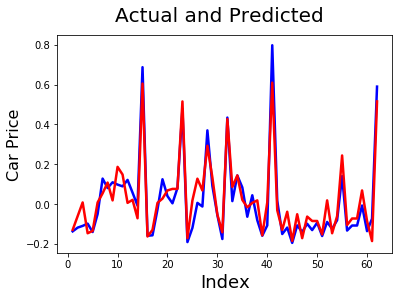

In [186]:
%matplotlib inline
# Actual and Predicted
import matplotlib.pyplot as plt
c = [i for i in range(1,63,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)                       # Y-label

The graph shows that the prediction is good. Little noise can be seen in 10-20 range. Apart from them everything else is good.

Text(0,0.5,'ytest-ypred')

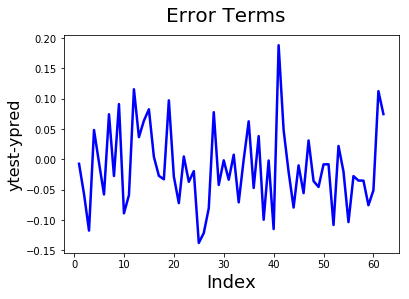

In [195]:
# Error terms
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

Error pattern is very random.

Text(0,0.5,'y_pred')

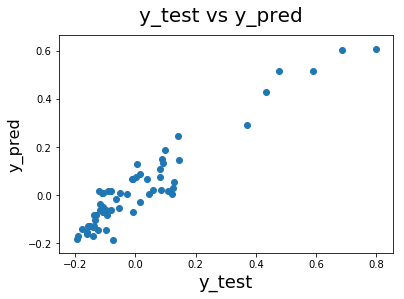

In [189]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

There is a linear relation between y_pred and y_test

Text(0,0.5,'Index')

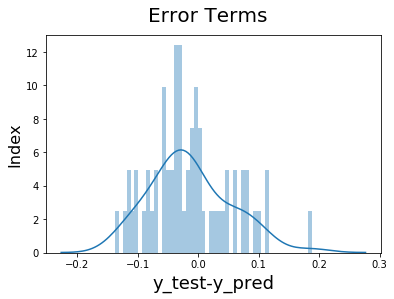

In [196]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)  

In [197]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.0676789263489


# Conclusion

The car price has a relation with the below parameters -    
enginelocation       0.4253      
carwidth             0.5088      
enginesize           0.5368      
carbrand_bmw         0.2257      
carbrand_peugeot    -0.0634

The model has a variance of 88% which is pretty good.
The mean square error is 6.7, the model is not able to match only 6.7% of data accurately.

The BMW brand name is having a positive effect on car price, where as the peugeot brand name is having a negative effect.

Enginelocation, carwidth and enginesize positively affects the car price.